In [4]:
# Imports and physical parameters

%matplotlib notebook

# Parameters for a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

from ddgclib._curvatures import *
#from ddgclib._misc import db, lb, normalized, vectorise_vnn

def mean_flow(HC, tau=0.5):
    """
    Compute a single iteration of mean curvature flow
    :param HC: Simplicial complex
    :return:
    """
    # Define the normals (NOTE: ONLY WORKS FOR CONVEX SURFACES)
    # Note that the cache HC.V is an OrderedDict:
    N_i = []

    for v in HC.V:
        N_i.append(normalized(v.x_a - np.array([0.5, 0.5, 0.5]))[0])

    f = []
    HNdA = []
    for i, v in enumerate(HC.V):
        F, nn = vectorise_vnn(v)
       # c_outd = curvatures(F, nn, n_i=N_i[i])
        c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_i[i])
       # HNdA.append(0.5*c_outd['HNdA_i'])
        #print(np.sum(c_outd['H_ij_sum']))
        #print(np.sum(c_outd['C_ijk']))
        #HNdA.append(np.sum(c_outd['H_ij_sum'])/np.sum(c_outd['C_ijk']))
        #HNdA.append(N_i[i] * np.sum(c_outd['H_ij_sum'])/np.sum(c_outd['C_ijk']))
        HNdA.append(c_outd['HNdA_i'])
        f.append(v.x_a)

    # Compute total volume
    # Compute constraint violation
    V_c = V_numeric - V_init  # < 0
    dV = V_c  * (f - origin)
    pass
    #print(f'HNdA = { HNdA}')
    #print(f"(np.sum(c_outd['H_ij_sum'])/np.sum(c_outd['C_ijk']))  = {(np.sum(c_outd['H_ij_sum'])/np.sum(c_outd['C_ijk']))}")
    df = np.nan_to_num(np.array(HNdA))
    f = np.array(f)
    #f_k = f - tau * df
    f_k = f + tau * df - dV
    VA = []
    for v in HC.V:
        VA.append(v.x_a)

    VA = np.array(VA)
    for i, v_a in enumerate(VA):
        HC.V.move(HC.V[tuple(v_a)], tuple(f_k[i]))

    if 0:
        HCV2 = list(copy.copy(HC.V))
        for i, v in enumerate(HCV2):
            HC.V.move(v, tuple(f_k[i]))

    return HC



In [5]:
# Droplet parameters
R = 1.0  # Radius of the droplet sphere
H_f = 1/R + 1/R
K_f = (1/R)**2

theta = 0
phi = 0.0

In [6]:
# Initiate a cubical complex
HC = Complex(3)
HC.triangulate()
#vc = HC.V[(0.5, 0.5, 0.5)]
#HC.V.remove(vc)

for i in range(0):
    HC.refine_all()

#for v in HC2V:
#    HC.refine_star(v)
del_list = []
for v in HC.V:
    if np.any(v.x_a == 0.0) or np.any(v.x_a == 1.0):
        continue
    else:
        del_list.append(v)

for v in del_list:
    HC.V.remove(v)
    
    
db = np.array([129, 160, 189]) / 255  # Dark blue
lb = np.array([176, 206, 234]) / 255  # Light blue
fig, axes, fig_s, axes_s = HC.plot_complex(point_color=db,
                                           line_color=db,
                                           complex_color_f=lb,
                                           complex_color_e=db
                                           )

<IPython.core.display.Javascript object>

/home/endres/iwt-projects/ddg/ddgclib/ddgclib/_curvatures.py:1429: RuntimeWarning: divide by zero encountered in true_divide
  HNdA_ij_Cij[j] = HNdA_ij[j] / C_ij[j]
/home/endres/iwt-projects/ddg/ddgclib/ddgclib/_curvatures.py:1429: RuntimeWarning: invalid value encountered in true_divide
  HNdA_ij_Cij[j] = HNdA_ij[j] / C_ij[j]
/home/endres/iwt-projects/ddg/ddgclib/ddgclib/_curvatures.py:1430: RuntimeWarning: divide by zero encountered in true_divide
  NdA_ij_Cij[j] = NdA_ij[j] / C_ij[j]
/home/endres/iwt-projects/ddg/ddgclib/ddgclib/_curvatures.py:1430: RuntimeWarning: invalid value encountered in true_divide
  NdA_ij_Cij[j] = NdA_ij[j] / C_ij[j]
/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<IPython.core.display.Javascript object>


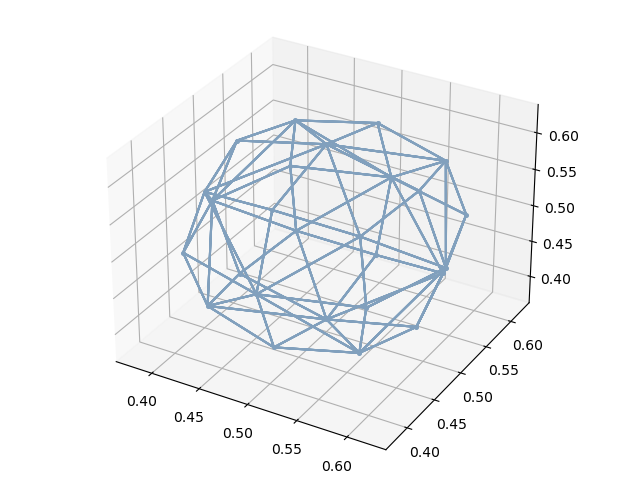

In [4]:
# Initiate a cubical complex
HC = Complex(3)
HC.triangulate()
#vc = HC.V[(0.5, 0.5, 0.5)]
#HC.V.remove(vc)

for i in range(1):
    HC.refine_all()

#for v in HC2V:
#    HC.refine_star(v)
del_list = []
for v in HC.V:
    if np.any(v.x_a == 0.0) or np.any(v.x_a == 1.0):
        continue
    else:
        del_list.append(v)

for v in del_list:
    HC.V.remove(v)
    
for i in range(200):
    HC = mean_flow(HC, tau=0.01)
    
fig, axes, fig_s, axes_s = HC.plot_complex(point_color=db,
                                           line_color=db,
                                           complex_color_f=lb,
                                           complex_color_e=db
                                           )

In [7]:
HC.save_complex()

HC.V.cache.keys() = odict_keys([(0.42206992477672471416, 0.4220699247767247142, 0.42206992477672471424), (0.5779300752232752856, 0.5779300752232752856, 0.57793007522327528565), (0.5779300752232752856, 0.4220699247767247141, 0.42206992477672471416), (0.4220699247767247141, 0.57793007522327528554, 0.4220699247767247141), (0.5779300752232752856, 0.5779300752232752856, 0.42206992477672471408), (0.4220699247767247141, 0.4220699247767247141, 0.57793007522327528554), (0.5779300752232752856, 0.42206992477672471405, 0.57793007522327528554), (0.42206992477672471405, 0.5779300752232752856, 0.5779300752232752856), (0.5, 0.40740606715859396355, 0.40740606715859396355), (0.5, 0.5, 0.37952409478483028362), (0.40740606715859396353, 0.5, 0.40740606715859396355), (0.5925939328414060365, 0.5, 0.4074060671585939636), (0.5, 0.59259393284140603653, 0.4074060671585939636), (0.5, 0.5, 0.62047590521516971635), (0.40740606715859396353, 0.40740606715859396353, 0.5), (0.59259393284140603653, 0.4074060671585939635

TypeError: dump() missing 1 required positional argument: 'fp'